In [1]:
import pandas as pd

In [2]:
import badfish as bf

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [3]:
df = pd.read_excel('badfish_data.xlsx')

In [4]:
## Convert the DataFrame into a MissFrame
mf = bf.MissFrame(df)

In [5]:
## Methods

## In a missframe, True means Miss. False means present.
dir(mf)

['__doc__',
 '__init__',
 '__module__',
 '_group_dat',
 '_masked_missframe',
 'cohort',
 'corr',
 'counts',
 'data',
 'frequency_item_set',
 'get_best_column_set',
 'miss_frame',
 'pattern',
 'plot']

In [6]:
df.columns

Index([u'user_id', u'email', u'timestamp', u'noJobs', u'id', u'companyName',
       u'designation', u'throughAMCAT', u'salary', u'dateOfJoining',
       u'dateOfLeaving', u'companyCity', u'candidateID', u'firstName',
       u'Attention to Detail', u'Computer Programming', u'Computer Science',
       u'English', u'Logical Ability', u'Personality', u'Quantitative Ability',
       u'gender', u'dob', u'pCityID', u'cCityID', u'boardName_10',
       u'boardName_12', u'boardPercent_10', u'passingYear_12',
       u'boardPercent_12', u'collegeName', u'collegeID', u'degreeID',
       u'subjectID', u'completionYear', u'overallPercentage',
       u'college_cityID', u'college_stateID', u'college_regionID', u'dom_p',
       u'subjectName_', u'field_of_study', u'cCity', u'cRegion', u'cState',
       u'pCity', u'pRegion', u'pState', u'pHRA', u'pMetro', u'college_city',
       u'college_region', u'college_state', u'collegeHRA', u'college_metro',
       u'njob', u'age', u'company_region', u'company_stat

In [7]:
## All MissFrame methods follow the Where/How/Columns api
## Where: Show me data where ___ are missing.
## How: Show me data where ___ columns are all/any missing.
## Columns: Show me only ___ columns.
mf.counts(where = ['companyMetro', 'gender'], how = 'any', columns = ['English'])
## How many companyState values *are missing* where CompanyMetro or Gender are missing.

badfish.py:121: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  mf_sum.sort(ascending = ascending)


English    32
dtype: int64

In [8]:
mf.pattern(columns = ['pHRA', 'pMetro'], norm = False, threshold=0.0)
## Note: True means missing in a missframe.
## Use where and any, to define a subset of data to search for patterns.

,pHRA,pMetro,0
0,False,False,11360
1,True,False,1099
2,True,True,32


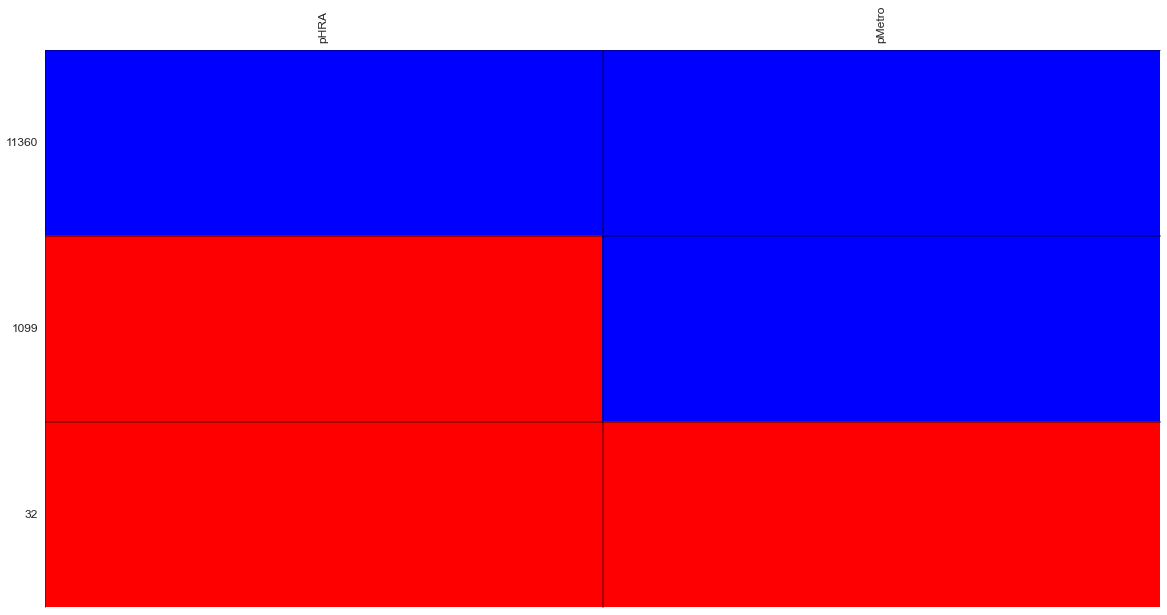

In [9]:
## Plotting these results.
import matplotlib.pyplot as plt
%matplotlib inline
mf.plot(kind='pattern', columns = ['pHRA', 'pMetro'], norm = False, threshold=0.0)
## Blue is Present, Red is missing. 
## Note raw counts on the left.

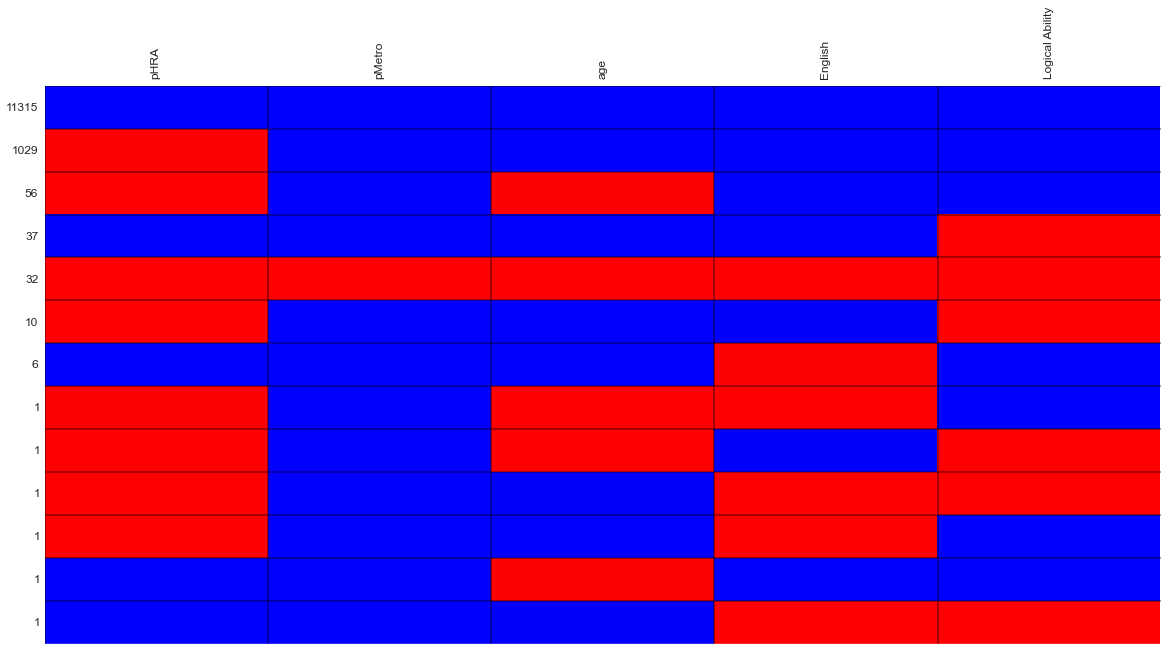

In [10]:
mf.plot(kind='pattern', columns = ['pHRA', 'pMetro', 'age', 'English', 'Logical Ability'], norm = False, threshold=0.0)

In [11]:
mf.corr(columns = ['age', 'gender'])
## Age and Gender go missing or present with correlation 0.88

,age,gender
age,1.000000,0.880752
gender,0.880752,1.000000


In [12]:
mf.pattern(columns = ['age', 'gender'])

,age,gender,0
0,False,False,0.991114


In [13]:
itemsets, rules = mf.frequency_item_set(columns = ['age', 'gender', 'pHRA'], support=0.0)

In [14]:
itemsets

,Itemset,Support
0,[age],91
1,"[gender, pHRA]",89
2,"[age, pHRA]",90
3,[gender],107
4,"[age, gender, pHRA]",87
5,[pHRA],1131
6,"[age, gender]",87


In [15]:
rules

,X =>,Y,Support,Confidence
0,"[gender, pHRA]",[age],87,0.977528
1,[gender],"[age, pHRA]",87,0.813084
2,"[age, pHRA]",[gender],87,0.966667
3,[age],"[gender, pHRA]",87,0.956044
4,"[age, gender]",[pHRA],87,1.000000
5,[gender],[pHRA],89,0.831776
6,[age],[pHRA],90,0.989011
7,[gender],[age],87,0.813084
8,[age],[gender],87,0.956044


In [7]:
## Experimental Cohort Analysis
## Where a particular column is missing, is there any significant mean difference in the remaining columns?
## So testing difference of averages of values between two groups (X is missing and X is not missing)

mf.cohort(group = ['age'])


,Column,Non-null values in Group (missing),Non-null values in Group (non-missing),Mean - Group (missing),Mean - Group (non-missing),T (Equal Variance),p value (Equal Variance),T (Unequal Variance),p value (Unequal Variance)
0,Attention to Detail,0,3045,NaN,633.161905,--,--,--,--
1,Computer Programming,41,8480,460.365854,451.567099,0.57032,0.568476,0.52237,0.604271
2,Computer Science,0,2202,NaN,407.212080,--,--,--,--
3,English,58,12391,509.172414,493.276249,1.15139,0.249593,1.31866,0.192491
4,Logical Ability,58,12351,495.241379,494.728524,0.0434309,0.965359,0.053034,0.957888
5,Personality,33,10348,177.303030,163.853692,1.70224,0.0887394,1.2081,0.235833
6,Quantitative Ability,55,12333,508.945455,501.918106,0.417919,0.676014,0.446572,0.656952
7,gender,4,12380,1.000000,0.760339,1.12277,0.261558,62.4651,0
8,pCityID,59,12400,3.745763,1468.139435,-12.0867,1.91006e-33,-159.903,0
9,cCityID,59,12400,78.932203,1417.744194,-11.5639,9.01458e-31,-23.7855,2.2758e-32


In [9]:
mf.get_best_column_set(mf)

TypeError: get_best_column_set() takes no arguments (2 given)

In [10]:
pd.DataFrame?